In [1596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import string
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, BatchNormalization,Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load datasets
supervised_data = pd.read_csv('/kaggle/input/outputdata/output.csv')
unsupervised_train = pd.read_json('/kaggle/input/ustrain/train.jsonl', lines=True)
unsupervised_val = pd.read_json('/kaggle/input/usvalidation/validation.jsonl', lines=True)

In [1597]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [1598]:
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

supervised_data[' title'] = supervised_data[' title'].apply(clean_text)

In [1599]:
# Separate features and labels
X = supervised_data[' title']
y = supervised_data['label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1600]:
# Define the maximum number of words and sequence length
max_words = 5000
max_sequence_length = 100

In [1601]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

In [1602]:
# Build the enhanced RNN model with more LSTMs
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))  # Explicit input_length

# Add the first LSTM layer
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Add the second LSTM layer
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Add a third LSTM layer if you want deeper memory capture
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Optionally, you can still include the GRU or SimpleRNN layer after multiple LSTMs
model.add(GRU(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# A SimpleRNN layer to process further
model.add(SimpleRNN(64, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Fully connected layers for classification
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [1603]:
# Explicitly build the model by providing the input shape
model.build(input_shape=(None, max_sequence_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now show the model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 100, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,705 (4.40 MB)

 Trainable params: 1,151,553 (4.39 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [1604]:
# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


In [1605]:
# Train the RNN model with validation data
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.8347 - loss: 1.0607 - val_accuracy: 0.6104 - val_loss: 1.9114 - learning_rate: 0.0010
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 76s 119ms/step - accuracy: 0.9778 - loss: 0.3600 - val_accuracy: 0.8677 - val_loss: 0.4669 - learning_rate: 0.0010
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 76s 119ms/step - accuracy: 0.9838 - loss: 0.1932 - val_accuracy: 0.9693 - val_loss: 0.1974 - learning_rate: 0.0010
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 76s 119ms/step - accuracy: 0.9878 - loss: 0.1128 - val_accuracy: 0.9683 - val_loss: 0.1517 - learning_rate: 0.0010
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 76s 119ms/step - accuracy: 0.9886 - loss: 0.0800 - val_accuracy: 0.9105 - val_loss: 0.3406 - learning_rate: 0.0010
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 76s 119ms/step - accuracy: 0.9901 - loss: 0.0673 - val_accuracy: 0.9527 - val_loss: 0.2710 - learning_rate: 0.0010
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 76s 119ms/step - accuracy: 0.9

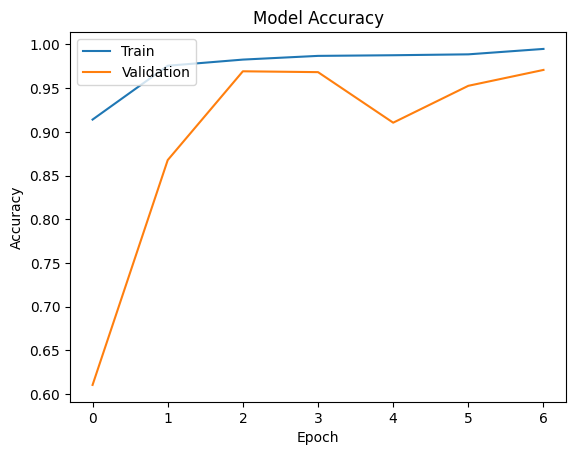

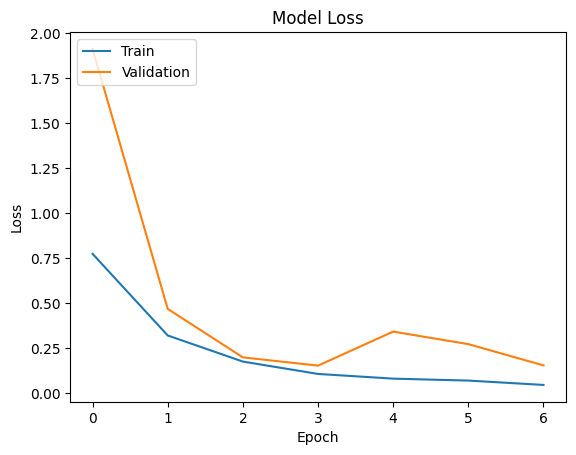

In [1606]:
# Plotting accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1607]:
# Evaluate the RNN model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {test_accuracy}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9693 - loss: 0.1630
Test accuracy: 0.9657705426216125


In [1608]:
# Predict on the test set
y_test_pred_probs = model.predict(X_test_padded)
y_test_pred = (y_test_pred_probs > 0.5).astype(int).flatten()

200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step


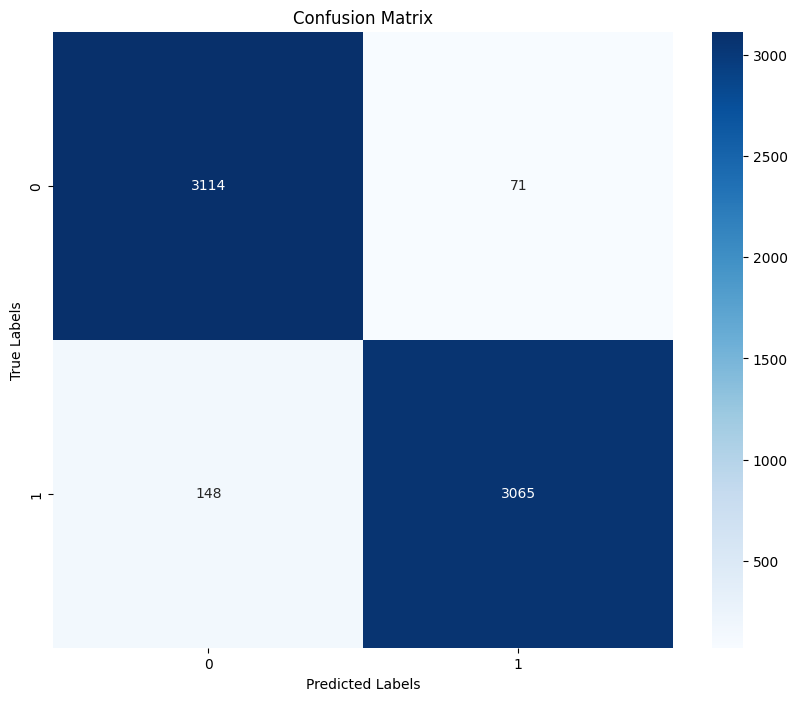

In [1609]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [1610]:
# Extract relevant text features from the unsupervised datasets
X_unlabeled_train = unsupervised_train['postText'].astype(str)
X_unlabeled_val = unsupervised_val['postText'].astype(str)


In [1611]:
X_unlabeled_train = X_unlabeled_train.apply(clean_text)
X_unlabeled_val = X_unlabeled_val.apply(clean_text)

In [1612]:
# Tokenize and pad the unsupervised data
X_unlabeled_train_seq = tokenizer.texts_to_sequences(X_unlabeled_train)
X_unlabeled_val_seq = tokenizer.texts_to_sequences(X_unlabeled_val)
X_unlabeled_train_padded = pad_sequences(X_unlabeled_train_seq, maxlen=100)
X_unlabeled_val_padded = pad_sequences(X_unlabeled_val_seq, maxlen=100)

In [1613]:
# Predict pseudo-labels for the unsupervised training data
pseudo_labels_train_probs = model.predict(X_unlabeled_train_padded)
pseudo_labels_train = (pseudo_labels_train_probs > 0.5).astype(int).flatten()

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


In [1614]:
# Select high-confidence samples for self-training
confidence_threshold = 0.8
high_confidence_idx_train = pseudo_labels_train_probs.flatten() >= confidence_threshold


In [1615]:
# Combine high-confidence pseudo-labeled data with original training data
X_combined_train = np.concatenate([X_train_padded, X_unlabeled_train_padded[high_confidence_idx_train]])
y_combined_train = np.concatenate([y_train, pseudo_labels_train[high_confidence_idx_train]])

In [1616]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [1617]:
# Retrain the model on the combined dataset
history_retraining = model.fit(X_combined_train, y_combined_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=[early_stopping, reduce_lr])

Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 86s 115ms/step - accuracy: 0.9844 - loss: 0.0974 - val_accuracy: 0.9629 - val_loss: 0.1647 - learning_rate: 0.0010
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 78s 113ms/step - accuracy: 0.9872 - loss: 0.0754 - val_accuracy: 0.9681 - val_loss: 0.1655 - learning_rate: 0.0010
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 78s 113ms/step - accuracy: 0.9902 - loss: 0.0708 - val_accuracy: 0.9385 - val_loss: 0.3874 - learning_rate: 0.0010


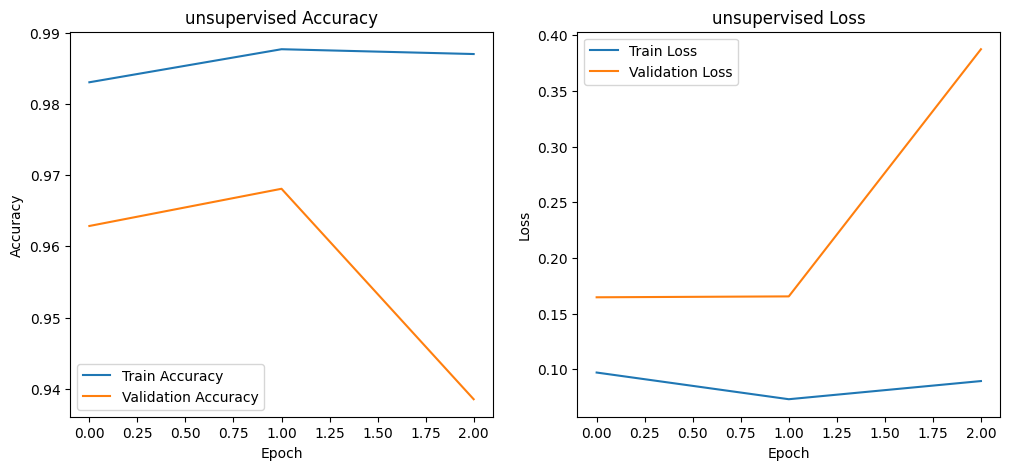

In [1618]:
# Plot accuracy and loss for retraining
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_retraining.history['accuracy'], label='Train Accuracy')
plt.plot(history_retraining.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('unsupervised Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_retraining.history['loss'], label='Train Loss')
plt.plot(history_retraining.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('unsupervised Loss')
plt.legend()

plt.show()



In [1619]:
model.save('globle context function4.h5')

# **Retraining**

In [2143]:
import pandas as pd
from tensorflow.keras.models import Model


srilanka_data = pd.read_csv('/kaggle/input/sldadta/clickbait_data_reduced2.csv')
srilanka_data.head()

,headline,label
0,Never Seen Before youth entrepreneurship,1
1,10 Things About Ayurvedic medicine practices,1
2,Are You Doing This? historical landmarks,1
3,Are You Doing This? climate change effects in ...,1
4,What Happens Next the cinnamon trade,1


In [2144]:
srilanka_data['label'].value_counts()

label
0    300
1    290
Name: count, dtype: int64

In [2145]:
from tensorflow.keras.models import load_model

pre_trained_model  = load_model('globle context function4.h5')

In [2146]:
# Prepare the data
X_srilanka = srilanka_data['headline'].apply(clean_text)
y_srilanka = srilanka_data['label']

In [2147]:
# Tokenize and pad the text data using the same tokenizer
X_srilanka_seq = tokenizer.texts_to_sequences(X_srilanka)
X_srilanka_padded = pad_sequences(X_srilanka_seq, maxlen=max_sequence_length)

In [2148]:
# Split the Sri Lankan dataset into training and testing sets
X_train_sri, X_test_sri, y_train_sri, y_test_sri = train_test_split(X_srilanka_padded, y_srilanka, test_size=0.2, random_state=42)


In [2149]:
# Compile the model again if needed
pre_trained_model.compile(optimizer=Adam(learning_rate=0.0001),  # reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [2150]:
# Early stopping with lower patience
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [2151]:
# Train the model on the new Sri Lankan dataset
history_sri = pre_trained_model.fit(X_train_sri, y_train_sri, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.7097 - loss: 1.2578 - val_accuracy: 0.6250 - val_loss: 1.4313
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7312 - loss: 1.0801 - val_accuracy: 0.6458 - val_loss: 1.1111
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7207 - loss: 0.9171 - val_accuracy: 0.6875 - val_loss: 0.9789
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7600 - loss: 0.6929 - val_accuracy: 0.7500 - val_loss: 0.9013
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.7118 - loss: 0.7567 - val_accuracy: 0.7500 - val_loss: 1.0527
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7124 - loss: 0.7128 - val_accuracy: 0.6875 - val_loss: 0.8829
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7336 - loss: 0.6667 - val_accuracy: 0.6875 - val_loss: 0.8794
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7295 - loss: 0.6884 - val_accuracy: 0.6875 - v

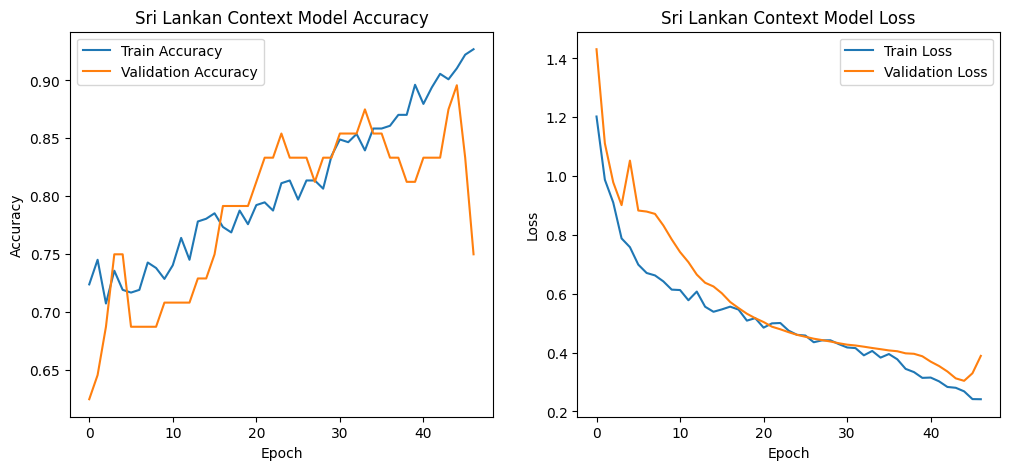

In [2152]:
# Plot accuracy and loss for the retraining
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sri.history['accuracy'], label='Train Accuracy')
plt.plot(history_sri.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Sri Lankan Context Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sri.history['loss'], label='Train Loss')
plt.plot(history_sri.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sri Lankan Context Model Loss')
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


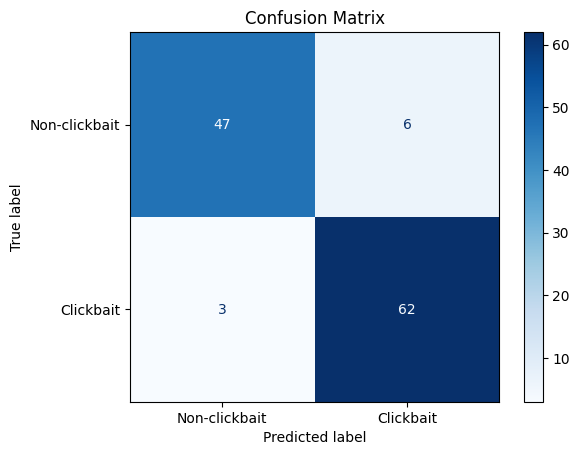

In [2153]:
# Predict on the test set
y_test_pred_probs1 = pre_trained_model.predict(X_test_sri)
y_test_pred1 = (y_test_pred_probs1 > 0.5).astype(int).flatten()

# Calculate the confusion matrix
cm = confusion_matrix(y_test_sri, y_test_pred1)

# Create and plot the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-clickbait', 'Clickbait'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [2154]:
# Evaluate the retrained model on the test set
test_loss_sri, test_accuracy_sri = pre_trained_model.evaluate(X_test_sri, y_test_sri)
print(f"Sri Lankan context test accuracy: {test_accuracy_sri}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9112 - loss: 0.2598
Sri Lankan context test accuracy: 0.9237288236618042


In [2155]:
# Predict on the test set
y_test_pred_probs1 = pre_trained_model.predict(X_srilanka_padded)
y_test_pred1 = (y_test_pred_probs1 > 0.5).astype(int).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [2156]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [2157]:
# Save the retrained model
pre_trained_model.save('srilanka_context_model.h5')

In [2304]:
# Manually given input
manual_texts = [
"The Untold Story of Sri Lanka’s Cricket Legend – You Won’t Believe It!"
]

# Tokenize and pad the text
manual_texts_seq = tokenizer.texts_to_sequences(manual_texts)
manual_texts_padded = pad_sequences(manual_texts_seq, maxlen=max_sequence_length)


In [2305]:
# Load the trained model
model = load_model('/kaggle/working/srilanka_context_model.h5')

# Make predictions
predictions = model.predict(manual_texts_padded)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


In [2306]:
print(predictions)

[[0.9680438]]


In [2288]:
# Example mapping (adjust based on your actual label encoding)
label_mapping = {0: 'Not Clickbait', 1: 'Clickbait'}

# Print the results
for text, label in zip(manual_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Label: {label_mapping[label]}\n")


Text: This Simple Trick Can Save You Thousands on Your Next Trip to Sri Lanka!
Predicted Label: Clickbait

